# Short Description

First the data is fixed from sqlite and merged with the help of pandas from the salaries and teams table. The win percentage is calculated and ploted vs total payroll. To make it more clear that the trend observed is not dependent on the frequency of payroll in the year, I take a mean and then I plot the mean total payroll vs time in years to make sure that the trend of increasing win percentage with increased payroll holds. Then on forward I look at individual teams plot and see which teams were favoured by increasing the total payroll in the period to achieve high winning percentage. The polyfit helped understand the increasing and descreasing trendline of each team in mean payroll vs mean win percentage. To make more clear depecititions I calculate the standardized payroll to get a stronger hold on the observation. Lastly on focusing upon OAK during the Moneyball period it can be clearly seen that they didn't pay as much as some of the competitiors however was able to buy undervalued players and help increase their effecieny and hence their chances of winning during 2000-2005.

In [1]:
import pandas as pd
import numpy as np
import warnings
from pandas.core.common import SettingWithCopyWarning
import matplotlib.pyplot as plt
import re   
import random
import sqlite3 as sql

# PART 1
There were many missing data, the salary in the salaries table prior to 1985 were missing. I deleted the data since we were trying to derive correlations between the payroll, years and teams which couldn't be derived from missing payroll data. 

In [2]:
sqlite_file = './lahman2014.sqlite'
conn = sql.connect(sqlite_file)

# selecting the teams table and summing up the salaries team wise in the salaries table.
teams_query = "SELECT * FROM Teams"
salary_query = "SELECT yearID, teamID, sum(salary) as total_payroll FROM Salaries GROUP BY teamID, yearID"

team_salaries = pd.read_sql(salary_query, conn)
teams = pd.read_sql(teams_query, conn)

def win_per(x):
    x['win_percentage']=( x['W'] / x['G']) * 100
    return x

# Calculate the winning percentage
teams = teams.apply(lambda x: win_per(x), 1)

# join based on teamID
teams = teams.merge(team_salaries, on=["yearID","teamID"])

pd.set_option('display.max_rows', None)
teams

41.975309     37144725.0  
319       54.320988     40269667.0  
320       51.851852     31135472.0  
321       60.493827     58516400.0  
322       48.148148     43558750.0  
323       49.689441     57740000.0  
324       53.416149     56802460.0  
325       48.765432     17272000.0  
326       41.614907     34655000.0  
327       41.975309     34072500.0  
328       48.447205     23655338.0  
329       59.259259     62241545.0  
330       40.123457     24018500.0  
331       55.555556     41540661.0  
332       47.530864     53448838.0  
333       46.913580     47079833.0  
334       62.345679     52278500.0  
335       41.975309     42155333.0  
336       46.913580     49768000.0  
337       51.234568     43559667.0  
338       56.790123     48692500.0  
339       51.851852     34777500.0  
340       54.320988     45380304.0  
341       48.148148     19295500.0  
342       54.320988     39800400.0  
343       41.975309     36656500.0  
344       48.765432     10771667.0  
345       46.913580     37363672.0  
346       55.555556     35592378.0  
347       45.061728     45456667.0  
348       52.469136     41281000.0  
349       48.765432     72355634.0  
350       56.790123     56757000.0  
351       49.079755     38335000.0  
352       54.938272     60800166.0  
353       40.123457     24065000.0  
354       44.720497     36862500.0  
355       43.209877     27927500.0  
356       70.370370     66806867.0  
357       45.679012     21303000.0  
358       47.204969     54087036.0  
359       38.888889     27280000.0  
360       54.320988     56572095.0  
361       53.987730     51376000.0  
362       40.123457     32347000.0  
363       65.432099     61186000.0  
364       55.214724     50838000.0  
365       47.530864     23005000.0  
366       47.530864     50484648.0  
367       33.333333     41322667.0  
368       62.962963     42374000.0  
369       51.234568     48820000.0  
370       45.679012     33914904.0  
371       40.123457     10641500.0  
372       54.320988     52077999.0  
373       46.296296     36297500.0  
374       42.331288     15065000.0  
375       60.493827     46861500.0  
376       54.601227     42565834.0  
377       50.920245     54672521.0  
378       43.209877     55388166.0  
379       48.148148     80605863.0  
380       58.024691     63497500.0  
381       46.296296     25620000.0  
382       59.876543     72978462.0  
383       42.857143     36489666.0  
384       39.751553     26225000.0  
385       39.130435     21257500.0  
386       60.493827     86734359.0  
387       53.703704     24431833.0  
388       48.765432     54125003.0  
389       42.592593     38870000.0  
390       58.641975     76709931.0  
391       51.851852     45444333.0  
392       61.728395     68703999.0  
393       63.580247     73140000.0  
394       41.358025     62343000.0  
395       58.895706     33962761.0  
396       44.444444     61935837.0  
397       39.506173     21085000.0  
398       59.876543     54914000.0  
399       47.530864     80862453.0  
400       45.962733     43377395.0  
401       41.975309     17903000.0  
402       59.509202     65092092.0  
403       47.530864     31692500.0  
404       48.447205     24697666.0  
405       45.679012     49768179.0  
406       53.086420     46595057.0  
407       46.583851     49778195.0  
408       50.617284     51464167.0  
409       45.679012     81447435.0  
410       52.469136     77940333.0  
411       58.641975     31133500.0  
412       55.555556     75880771.0  
413       48.765432     58265167.0  
414       47.530864     23433000.0  
415       42.592593     16519500.0  
416       54.037267     92338260.0  
417       56.521739     31971333.0  
418       56.172840     58915000.0  
419       42.857143     62765129.0  
420       43.827160     70795921.0  
421       51.234568     44838332.0  
422       52.469136     81027833.0  
423       58.641975     84537836.0  
424       40.123457     60539333.0  
425       52.147239     46867200.0  
426       50.6

# Part 2

# Problem 2

Plot of Yearly payroll vs Year is depicted in the graph

In [3]:
all_teams = teams[teams['yearID'] >= 1990]
unique_teams = all_teams.teamID.unique()
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

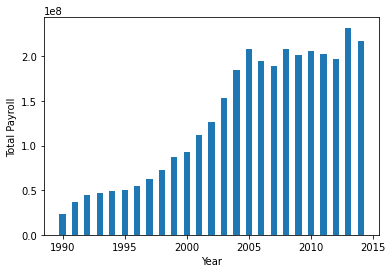

In [4]:
sub_teams = teams[teams['yearID'] >= 1990]
sub_teams['yearID'].astype('int')
sub_teams['total_payroll'].astype('float')

# reducing the size of the table for faster processing
sub_teams = sub_teams[['yearID','total_payroll','win_percentage']]


ax = plt.subplot()

# Ploting a bar graph based on the total payroll in that year vs the year
ax.bar(sub_teams['yearID'], sub_teams['total_payroll'],width=0.5)

# Labeling the axis
plt.xlabel('Year')
plt.ylabel('Total Payroll')
plt.show()

pd.set_option('display.max_rows', 1000)
# sub_teams

# Question 1 
The total payroll for the year keeps on increasing over the years. With time the total payroll made by the all the teams in the year is increasing with each year. The overall spread in increasing over time. The mean of the overall graph would be around 0.6*10^8 looking at the graph. The trend for payrolls increases over time. 

# Problem 3

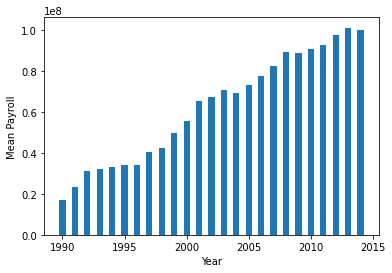

In [5]:
#  creating copy of the team table with yearID, total_payroll and win_percentage
sub_teams_avg = sub_teams.copy()

# mean of each years total payroll
sub_teams_avg = sub_teams_avg.groupby('yearID', as_index=False).mean()


ax = plt.subplot()

# bar graph plot of Mean total payroll vs Time
ax.bar(sub_teams_avg['yearID'], sub_teams_avg['total_payroll'],width=0.5)
# labeling of axis
plt.xlabel('Year')
plt.ylabel('Mean Payroll')
plt.show()
# sub_teams_avg

# Problem 4


In [6]:
def cutting(a):
    bins = [1990, 1995, 2000, 2005, 2010, 2015]

    # Cut the teams to a period of [1990,1995) ...
    a.loc[:,'yearID'] = pd.cut(a['yearID'],bins, right=False).astype(str)

    #  storing the average values of payroll and win percentage
    a_avg = a.groupby(a['yearID'], as_index=False).mean()

    return a_avg

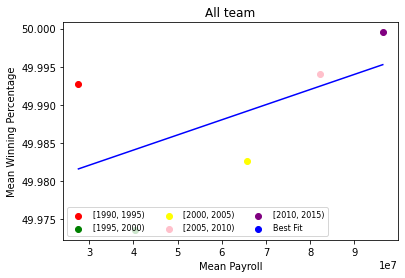

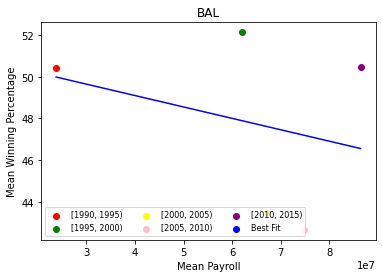

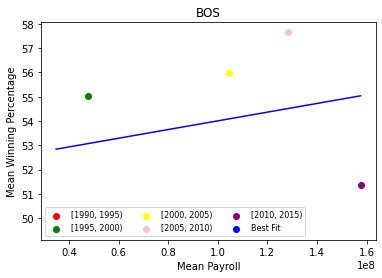

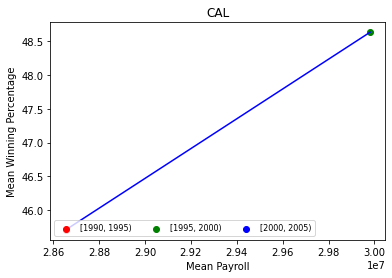

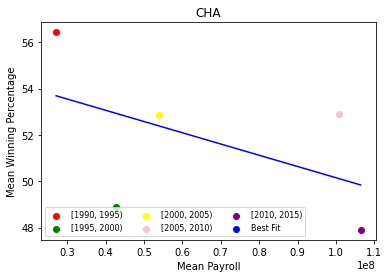

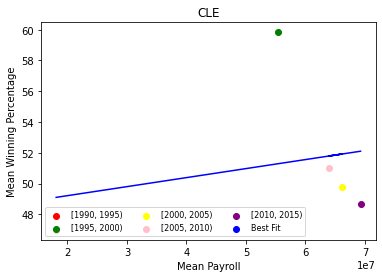

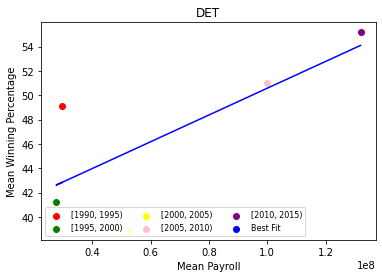

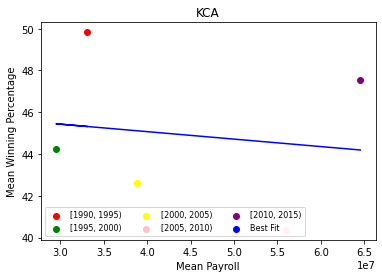

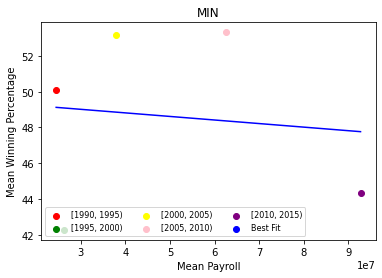

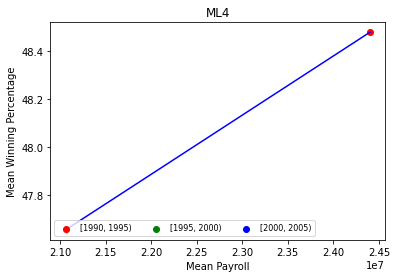

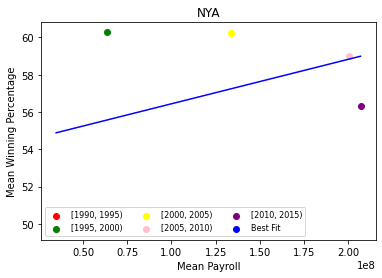

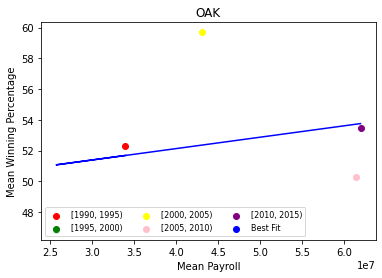

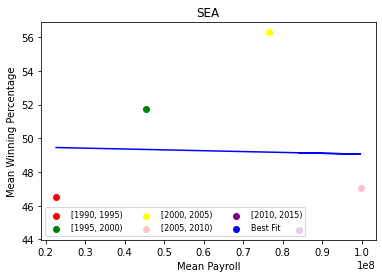

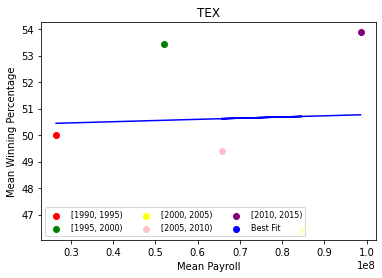

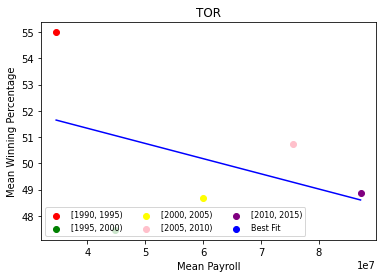

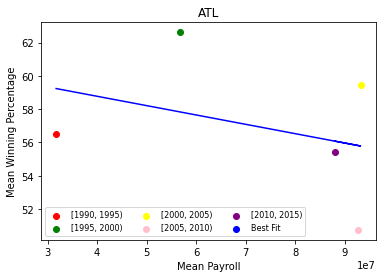

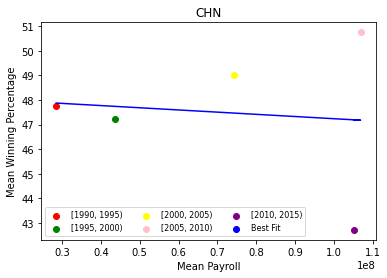

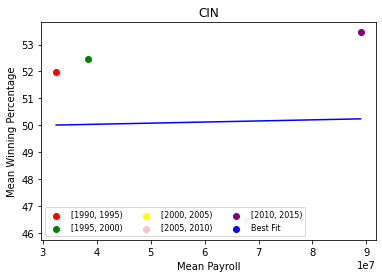

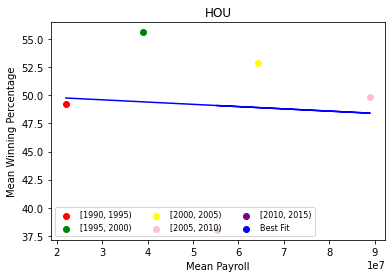

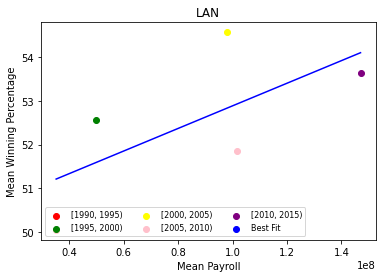

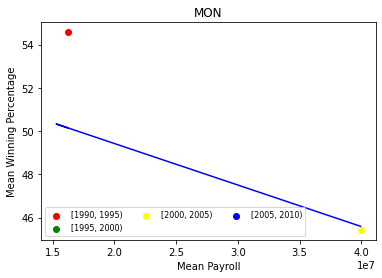

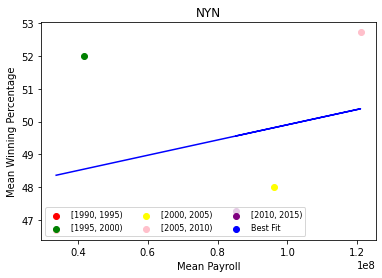

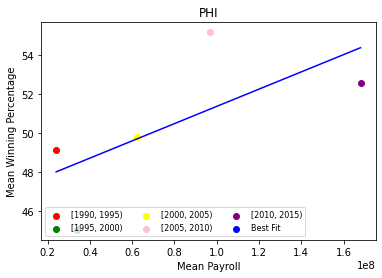

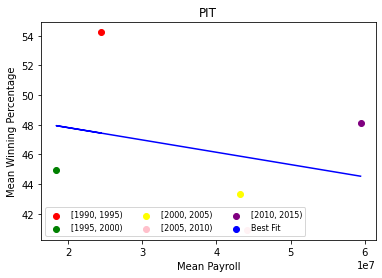

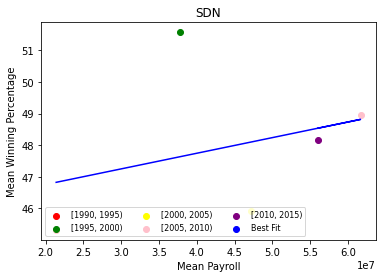

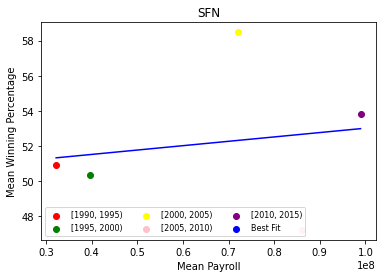

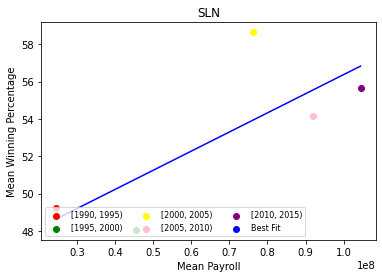

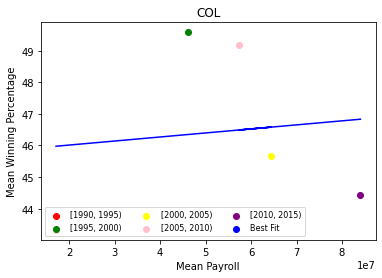

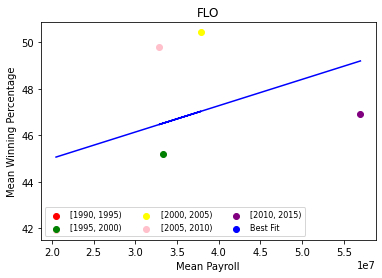

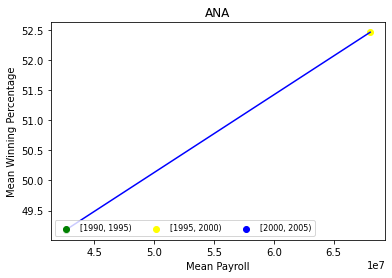

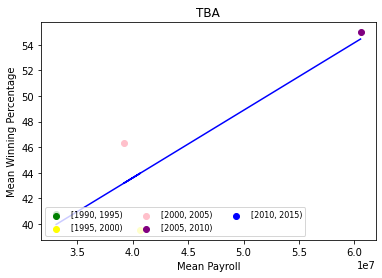

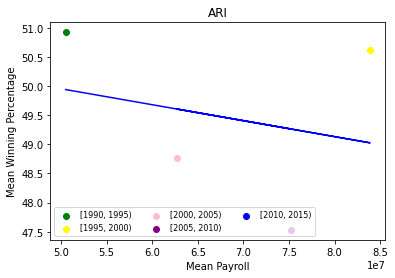

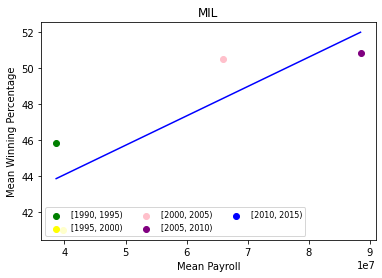

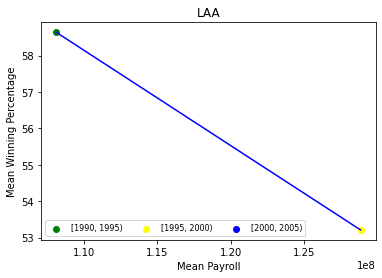

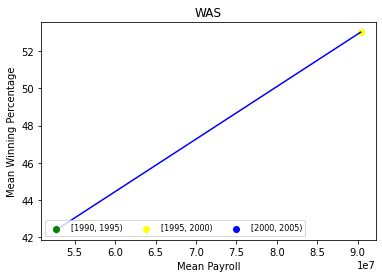

<ipython-input-7-2c0f7b9cf25d>:71: RankWarning: Polyfit may be poorly conditioned
  plotting_scatter(individual_team, x)


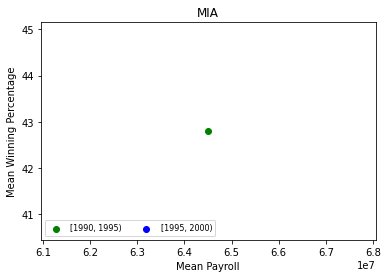

In [7]:
def plotting_scatter(sub_teams_avg, str):

    colors = np.array(["red","green","yellow","pink","purple","beige","brown","gray","cyan","magenta"])
    prior = 1990
    i = 0
    scatter = []

# iterrating over the mean total payroll of each year and ploting the scatter points
# the scatter points show the mean total payroll with the mean winning percentage
    for index, row in sub_teams_avg.iterrows():

        if  index == 0 and int(row.yearID[1:5]) == 1990:
            scatter.append(plt.scatter(row['total_payroll'], row['win_percentage'], color= colors[i]))
        
        elif int(row.yearID[1:5]) != prior:
            i+=1
            prior = int(row.yearID[1:5])
            scatter.append(plt.scatter(row['total_payroll'], row['win_percentage'], color= colors[i]))
        
        else:
            plt.scatter(row['total_payroll'], row['win_percentage'], color= colors[i])

    # slope and intercept of the polyfit line
    slope, intercept = np.polyfit(sub_teams_avg['total_payroll'],  sub_teams_avg['win_percentage'], deg = 1)

    # x values of the line
    abline_values = [slope * i + intercept for i in sub_teams_avg['total_payroll']]

    # ploting the polyfit line
    line = plt.plot(sub_teams_avg['total_payroll'], abline_values, 'b')

    # for the legend of the polyfit line
    mask = sub_teams_avg['win_percentage'] > 100
    scatter.append(plt.scatter(sub_teams_avg[mask], sub_teams_avg[mask], color= "blue"))


    # legend of the year range
    plt.legend(scatter,
            ('[1990, 1995)', '[1995, 2000)', '[2000, 2005)', '[2005, 2010)', '[2010, 2015)','Best Fit'),
            scatterpoints=1,
            loc='lower left',
            ncol=3,
            fontsize=8)
    # label of the graph 
    plt.xlabel('Mean Payroll')
    plt.ylabel('Mean Winning Percentage')
    plt.title(str)
    plt.show()

# calculate the max payroll contributors for each year


def individual(str):
    in_team_lst = []
    in_team_lst = teams['teamID'].apply(lambda x: True if x == str else False)
    in_team = teams[in_team_lst]

    return in_team


# plot all the teams
sub_teams_avg = cutting(sub_teams[['yearID','total_payroll','win_percentage']])
plotting_scatter(sub_teams_avg, "All team")


# plot of individual teams
for x in unique_teams:
    
    individual_team = individual(x)
    individual_team = cutting(individual_team[['yearID','total_payroll','win_percentage']])
    plotting_scatter(individual_team, x)



# Question 2

Looking at the graph it can seen that the best fit line is also increasing with time. SOme of the teams such as BOS, PHI have invested high amount in payroll and have received higher winning percentage. BOS and PHI have one of the highest investment of about 1.6 * 10^8 and have seen results. Some teams have shown a downward trending line with increasing the investment like TOR. Oakland A's has had a steady increase in mean payroll vs mean win percentage. They have been efficent since they have been paying less payroll however have been able to increase their winning percentage.

# Part 3

# Problem 5

In [8]:
new_teams = teams.copy()

# grouping calculate the standard deviation of the total_payroll
stdev_payroll = new_teams[['yearID','total_payroll']].groupby('yearID', as_index=False).std()

# renaming the columns
stdev_payroll.rename(columns={'total_payroll':'stdev_payroll'},inplace=True)

# grouping calculate the mean of the total_payroll
avg_payroll = new_teams[['yearID','total_payroll']].groupby('yearID', as_index=False).mean()

# renaming the columns
avg_payroll.rename(columns={'total_payroll':'mean_payroll'},inplace=True)

# adding mean payroll and std payroll to the new teams table
new_teams['mean_payroll'] = new_teams['yearID'].apply(lambda x: (avg_payroll[avg_payroll['yearID'] == x]).iloc[0]['mean_payroll'])   

new_teams['stdev_payroll'] = new_teams['yearID'].apply(lambda x: (stdev_payroll[stdev_payroll['yearID'] == x]).iloc[0]['stdev_payroll'])    

new_teams.insert(52, 'standardized_payroll', 0.0)

# Calculating and storing standarized payroll
for index, row in new_teams.iterrows():
    new_teams['standardized_payroll'][index] = float(row.total_payroll - row.mean_payroll)/row.stdev_payroll

new_teams

7             -0.738300  
508  7.094207e+07   2.801196e+07              0.571795  
509  7.094207e+07   2.801196e+07             -1.831791  
510  7.094207e+07   2.801196e+07              1.161989  
511  7.094207e+07   2.801196e+07             -0.702310  
512  7.094207e+07   2.801196e+07              0.346814  
513  7.094207e+07   2.801196e+07              1.260233  
514  7.094207e+07   2.801196e+07              0.318659  
515  7.094207e+07   2.801196e+07             -0.413623  
516  7.094207e+07   2.801196e+07             -0.134314  
517  7.094207e+07   2.801196e+07             -0.767246  
518  7.094207e+07   2.801196e+07              0.003496  
519  7.094207e+07   2.801196e+07              1.236277  
520  7.094207e+07   2.801196e+07             -1.082219  
521  7.094207e+07   2.801196e+07             -0.678052  
522  7.094207e+07   2.801196e+07              1.639812  
523  7.094207e+07   2.801196e+07             -0.005786  
524  7.094207e+07   2.801196e+07             -0.575813  
525  7.094207e+07   2.801196e+07             -0.918610  
526  7.094207e+07   2.801196e+07              0.425179  
527  7.094207e+07   2.801196e+07              0.458540  
528  6.902220e+07   3.282411e+07              0.960040  
529  6.902220e+07   3.282411e+07             -0.530064  
530  6.902220e+07   3.282411e+07              1.775411  
531  6.902220e+07   3.282411e+07             -0.116064  
532  6.902220e+07   3.282411e+07             -1.057238  
533  6.902220e+07   3.282411e+07             -0.676033  
534  6.902220e+07   3.282411e+07             -0.652362  
535  6.902220e+07   3.282411e+07             -0.470301  
536  6.902220e+07   3.282411e+07              3.508754  
537  6.902220e+07   3.282411e+07             -0.292362  
538  6.902220e+07   3.282411e+07              0.380624  
539  6.902220e+07   3.282411e+07             -1.202333  
540  6.902220e+07   3.282411e+07             -0.425656  
541  6.902220e+07   3.282411e+07             -0.579001  
542  6.902220e+07   3.282411e+07              0.023110  
543  6.902220e+07   3.282411e+07              0.644657  
544  6.902220e+07   3.282411e+07              0.656158  
545  6.902220e+07   3.282411e+07             -0.682637  
546  6.902220e+07   3.282411e+07             -0.108976  
547  6.902220e+07   3.282411e+07             -0.818884  
548  6.902220e+07   3.282411e+07              0.194211  
549  6.902220e+07   3.282411e+07              0.727508  
550  6.902220e+07   3.282411e+07             -1.264122  
551  6.902220e+07   3.282411e+07             -0.856830  
552  6.902220e+07   3.282411e+07              0.842026  
553  6.902220e+07   3.282411e+07              0.728031  
554  6.902220e+07   3.282411e+07             -1.120952  
555  6.902220e+07   3.282411e+07             -0.415468  
556  6.902220e+07   3.282411e+07              0.395958  
557  6.902220e+07   3.282411e+07              0.432796  
558  7.295711e+07   3.417478e+07              0.028010  
559  7.295711e+07   3.417478e+07              1.479103  
560  7.295711e+07   3.417478e+07              0.064986  
561  7.295711e+07   3.417478e+07             -0.920404  
562  7.295711e+07   3.417478e+07             -0.113098  
563  7.295711e+07   3.417478e+07             -1.055636  
564  7.295711e+07   3.417478e+07              0.641137  
565  7.295711e+07   3.417478e+07             -0.490745  
566  7.295711e+07   3.417478e+07              3.960514  
567  7.295711e+07   3.417478e+07             -0.512991  
568  7.295711e+07   3.417478e+07              0.432987  
569  7.295711e+07   3.417478e+07             -1.266374  
570  7.295711e+07   3.417478e+07             -0.500606  
571  7.295711e+07   3.417478e+07             -0.797009  
572  7.295711e+07   3.417478e+07             -0.310988  
573  7.295711e+07   3.417478e+07              0.395034  
574  7.295711e+07   3.417478e+07              0.411877  
575  7.295711e+07   3.417478e+07             -0.323763  
576  7.295711e+07   3.417478e+07             -0.734990  
577  7.295711e+07   3.417478e+07         

# Problem 6

In [9]:
# split according to period of [1990, 1995) ....
def divide(b):
    bins = [1990, 1995, 2000, 2005, 2010, 2015]
    b_avg = b.copy()
    b_avg = b_avg[b_avg.yearID >=1990]
    b_avg['year_range'] = pd.cut(new_teams['yearID'],bins, right=False).astype(str)
    
    return b_avg

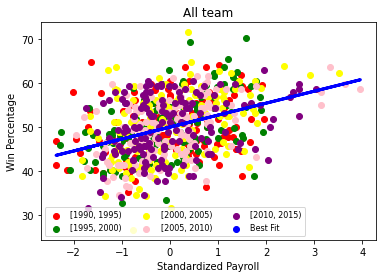

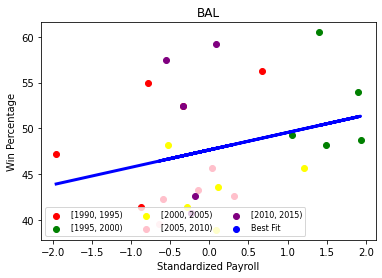

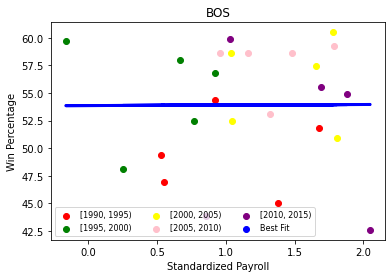

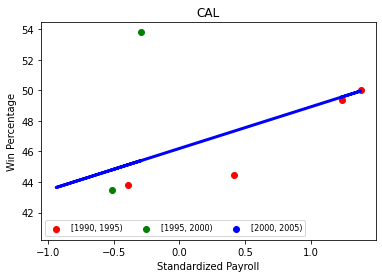

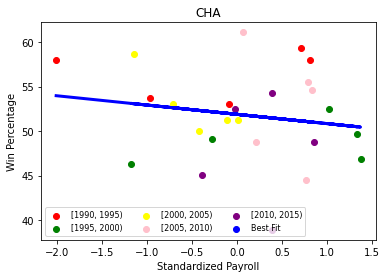

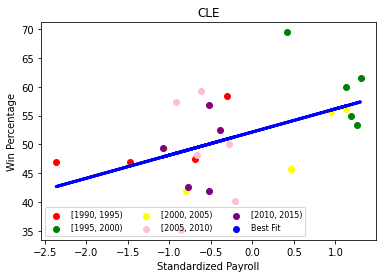

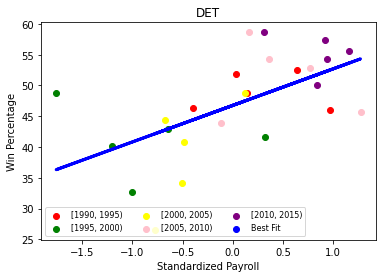

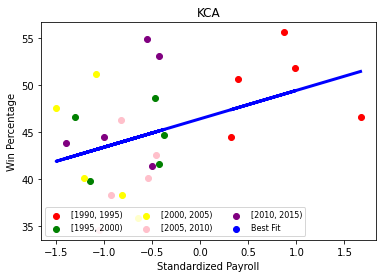

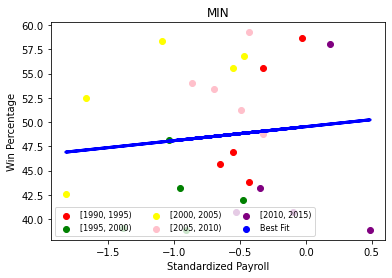

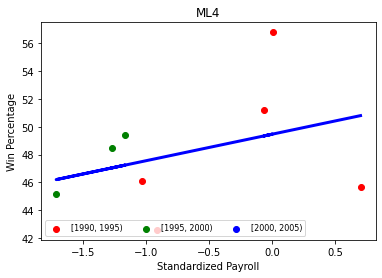

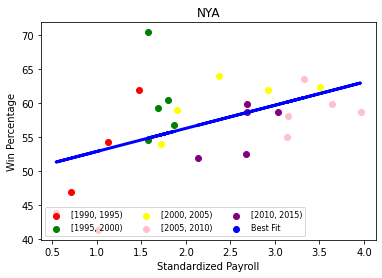

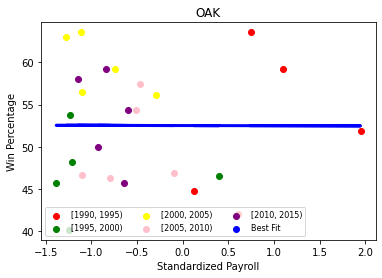

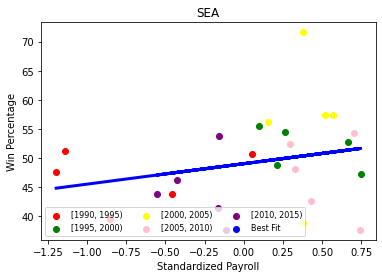

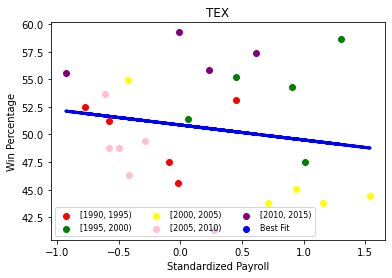

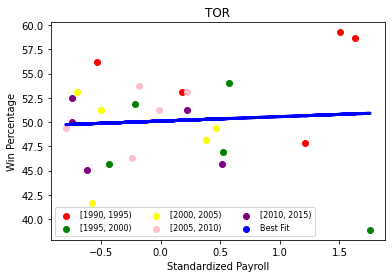

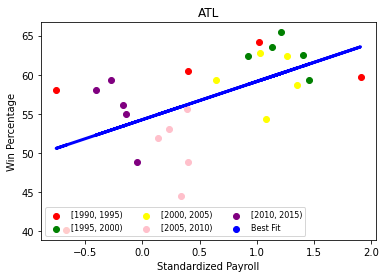

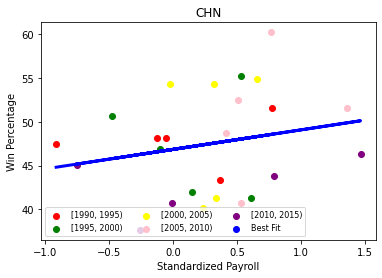

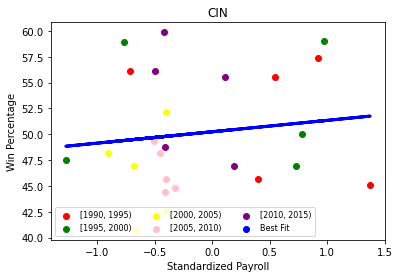

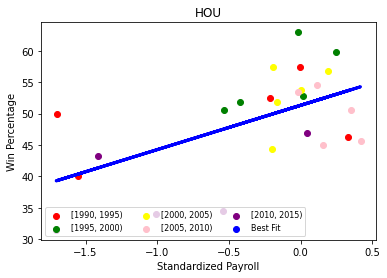

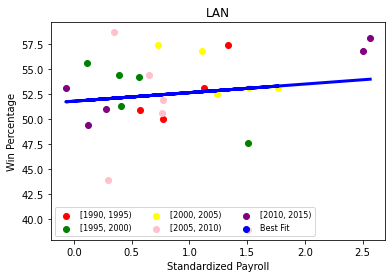

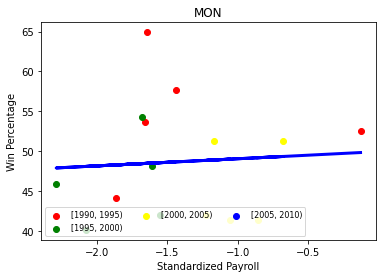

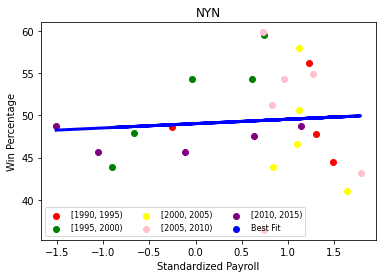

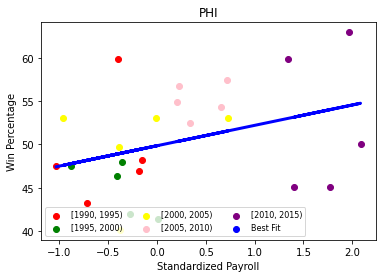

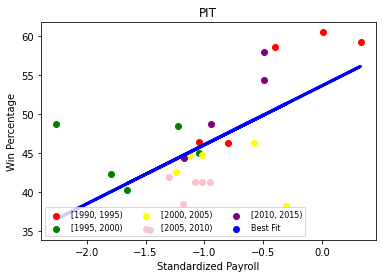

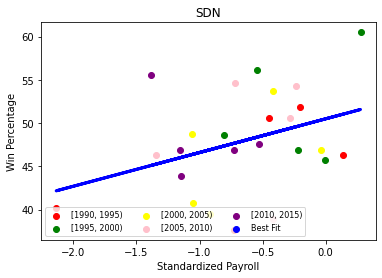

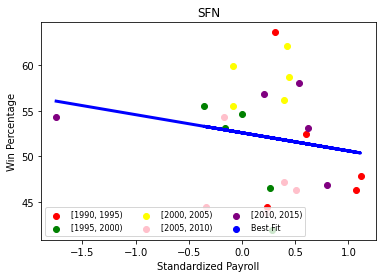

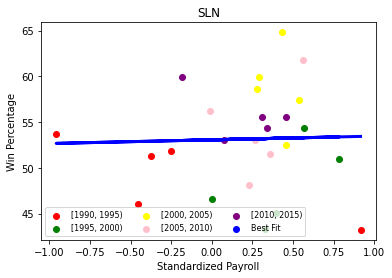

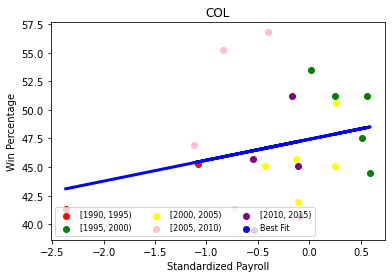

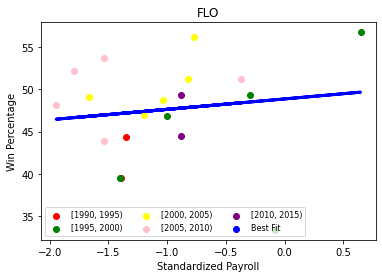

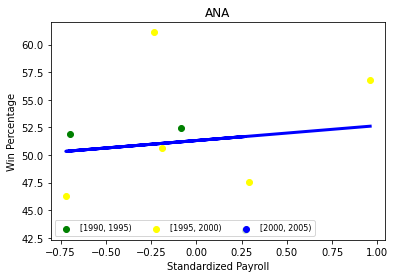

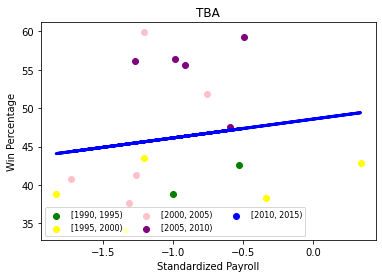

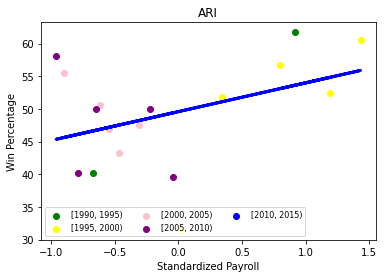

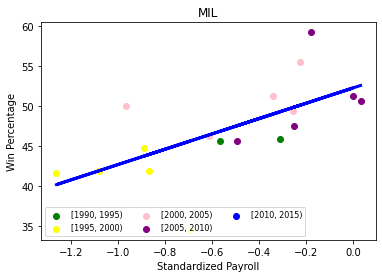

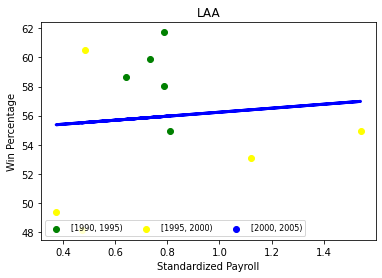

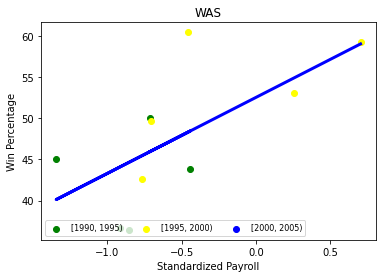

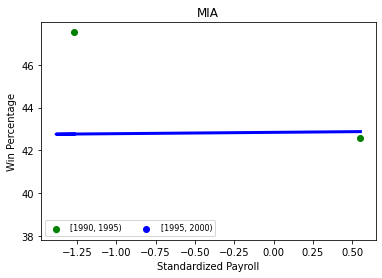

In [10]:
def plot_standard(teams_avg, str):
    colors = np.array(["red","green","yellow","pink","purple","beige","brown","gray","cyan","magenta"])
    scatter = []
    prior = '1990'
    i = 0
    j = 0

# iterrating over the standardized total payroll of each year and ploting the scatter points
    for index, row in teams_avg.iterrows():

        if  j == 0 and int(row.year_range[1:5]) == 1990:
            j+=1
            scatter.append(plt.scatter(row['standardized_payroll'], row['win_percentage'], color= colors[i]))

        elif row.year_range[1:5] != prior:
            i+=1
            prior = (row.year_range[1:5])
            scatter.append(plt.scatter(row['standardized_payroll'], row['win_percentage'], color= colors[i]))

        else:
            plt.scatter(row['standardized_payroll'], row['win_percentage'], color= colors[i])



     # slope and intercept of the polyfit line
    slope, intercept = np.polyfit(teams_avg['standardized_payroll'],  teams_avg['win_percentage'], deg = 1)

    # x values of the line
    abline_values = [slope * i + intercept for i in teams_avg['standardized_payroll']]

    # ploting the polyfit line
    line = plt.plot(teams_avg['standardized_payroll'], abline_values, 'b', linewidth=3)

    mask = teams_avg['win_percentage'] > 100
    scatter.append(plt.scatter(teams_avg[mask], teams_avg[mask], color= "blue"))

    # Legend for the plot
    plt.legend(scatter,
            ['[1990, 1995)', '[1995, 2000)', '[2000, 2005)', '[2005, 2010)', '[2010, 2015)','Best Fit'],
            scatterpoints=1,
            loc='lower left',
            ncol=3,
            fontsize=8)
    
    # Labeling of axes and title
    plt.xlabel('Standardized Payroll')
    plt.ylabel('Win Percentage')
    plt.title(str)
    plt.show()

# split dataframe based of teams
def ind(str):
    in_team_lst = []
    in_team_lst = new_teams['teamID'].apply(lambda x: True if x == str else False)
    in_team = new_teams[in_team_lst]

    return in_team



# plot all the teams
new_teams_avg = divide(new_teams)
plot_standard(new_teams_avg, "All team")


# plot of individual teams
for x in unique_teams:
        
    individual_team_standard = ind(x)
    individual_team_standard = divide(individual_team_standard)
    plot_standard(individual_team_standard, x)


# Question 3

The plot of problem 6 is much more understandable then the plot of problem 4 since it represents the central tendency of the graph. With many plots focused on the 0 point and as move away from 0 it shows the step deviations. The scatter points decrease with the distance away from the 0. It also helps with developing an equation of line which best fits the graph. 

# Problem 7


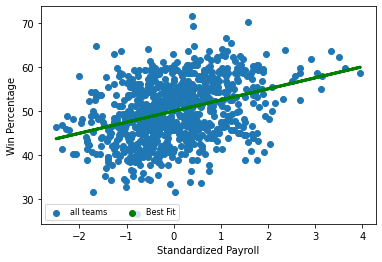

Line equation: y = 2.526950x + 49.984052


In [11]:
scatter = []

scatter.append(plt.scatter(new_teams['standardized_payroll'], new_teams['win_percentage']))

# slope and intercept of best fit line
slope, intercept = np.polyfit(new_teams['standardized_payroll'],  new_teams['win_percentage'], deg = 1)


abline_values = [slope * i + intercept for i in new_teams['standardized_payroll']]

# best fit plot
line = plt.plot(new_teams['standardized_payroll'], abline_values, 'g', linewidth=3)

mask = new_teams['win_percentage'] > 100
scatter.append(plt.scatter(new_teams[mask], new_teams[mask], color= "green"))

# Legend and labeling of the axes
plt.legend(scatter,
           ('all teams','Best Fit'),
           scatterpoints=1,
           loc='lower left',
           ncol=3,
           fontsize=8)
plt.xlabel('Standardized Payroll')
plt.ylabel('Win Percentage')
plt.show()
print("Line equation: y = %fx + %f"%(slope,intercept))

# Problem 8

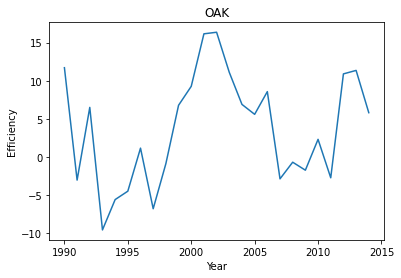

In [12]:
team_all = new_teams.copy()
i = 0

# sepearting the data related to teamID OAK
for index, row in team_all.iterrows():

    if(row.teamID == 'OAK' and row.yearID >=1990):
        team_all.at[i] = row
        i+=1

team_all = team_all[:i]

# inserting the efficiency column
team_all.insert(loc=53,column='efficency', value=0.0)

# calculating the efficiency
for index, row in team_all.iterrows():
    row['efficency'] =  row.win_percentage - (50 + 2.5 * row.standardized_payroll)
    team_all.at[index] = row


# Labeling the axes and title of the plot
plt.plot(team_all['yearID'],team_all['efficency'])
plt.xlabel("Year")
plt.ylabel("Efficiency")
plt.title("OAK")
plt.show()

# Question 4

From plots 2 and 3, Oakland didn't pay much to the players however was able to increase its percentage of win. It can be clearly seen that during the Moneyball period from 2000 to 2005, there was peak in their efficency of around 15% on picking underpayed good players for their team.